# Breaking MCMC: difficult densities

#### We're fortunate that much of the time the posterior functions we care about are relatively simple, i.e. unimodal and roughly Gaussian shaped. But not always! So, let's have a look at some density functions that simple MCMC samplers have trouble with. There are loads of functions to choose from (see [this Wikipedia entry](https://en.wikipedia.org/wiki/Test_functions_for_optimization)), but the two given here exemplify the cases that you're most likley to see in practice, namely
1. strong, non-linear degeneracies, and
2. multiple peaks.

#### Since these test functions are intended to work out *minimization* codes, we'll interpret them as minus the log-posterior.

## Rosenbrock function: the dreaded "banana"

#### As the subtitle suggests, this function is an extreme version of the banana-shaped degeneracies we sometimes see in practice, for example this:

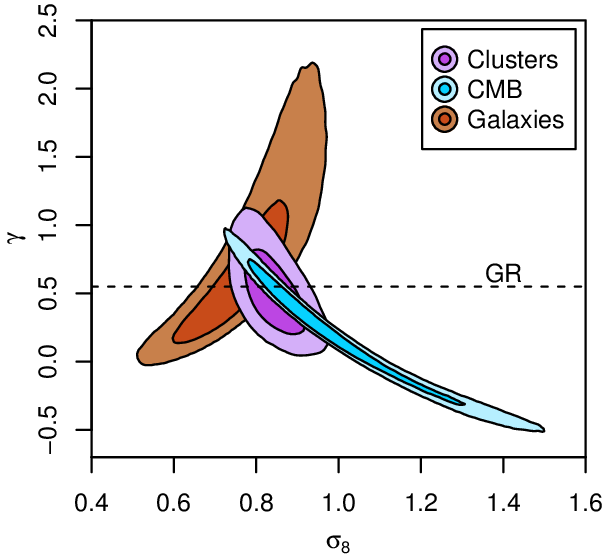

In [6]:
from IPython.display import Image
Image(filename="DifficultDensities_banana_eg.png", width=350)

#### Here's the Rosenbrock function in code. Since we're pretending it's the log-posterior, I've introduced a minus sign that doesn't normally appear.

In [8]:
def Rosenbrock_lnP(x, y, a=1.0, b=100.0):
    return -( (a-x)**2 + b*(y-x**2)**2 )

#### Let's plot "standard delta-log-pdf" contours, just to get a feel for the shape of the function.

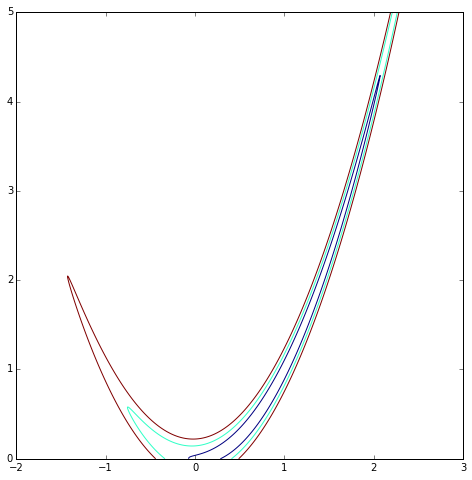

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) 

xs = np.arange(-2.0, 3.0, 0.0025)
ys = np.arange(0.0, 5.0, 0.0025)
zs = np.array([Rosenbrock_lnP(xs,y) for y in ys])
plt.contour(xs, ys, -2.0*zs, levels=[2.3, 6.18, 11.8]);

#### That's one ugly banana! It's worth noting that, in less extreme cases, cleverly re-parametrizing your model can be a significant help, for example sampling the logarithm of a parameter with a large dynamic range. As you'll see in the homework, however, it's important to be aware of the effect re-parametrizations have on the prior if not done carefully. As you can see below, considering $\ln(y)$ instead of $y$ makes *part* of the posterior distribution look easier to deal with... but at the cost of introducing another little problem.

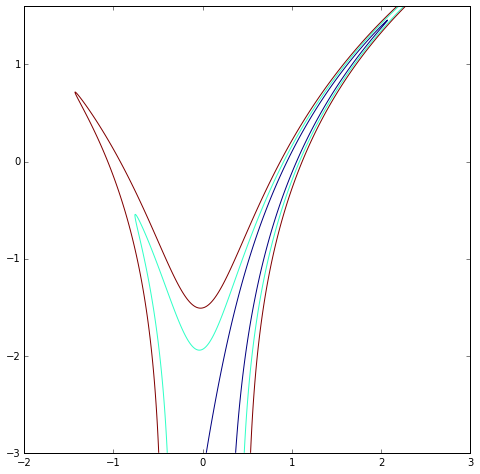

In [50]:
xs = np.arange(-2.0, 3.0, 0.0025)
lnys = np.arange(-3.0, 1.6, 0.0025)
zs = np.array([Rosenbrock_lnP(xs,y) for y in np.exp(lnys)])
plt.contour(xs, lnys, -2.0*zs, levels=[2.3, 6.18, 11.8]);

## Eggbox function: multiple modes

#### Next, we look at an "eggbox" function. Again, the function below will be interpreted as a log-posterior.

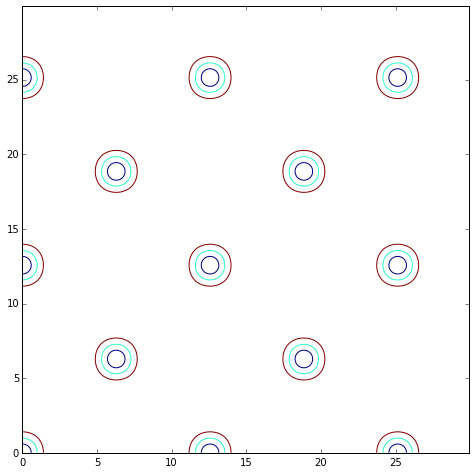

In [29]:
def eggbox_lnP(x, y):
    return (2.0 + np.cos(0.5*x)*np.cos(0.5*y))**3

xs = np.arange(0.0, 30.0, 0.1)
ys = np.arange(0.0, 30.0, 0.1)
zs = np.array([eggbox_lnP(xs,y) for y in ys])
plt.contour(xs, ys, -2.0*(zs-np.max(zs)), levels=[2.3, 6.18, 11.8]);

#### Yikes! Lot's of well separated peaks in the posterior distribution. To converge properly, chains need to be able to move between them, which is clearly a challenge for the approach we've used so far.

#### As it happens, the real-world CMB banana contour plot given above also features a (minor) secondary peak, which is visible in the marginal posterior.

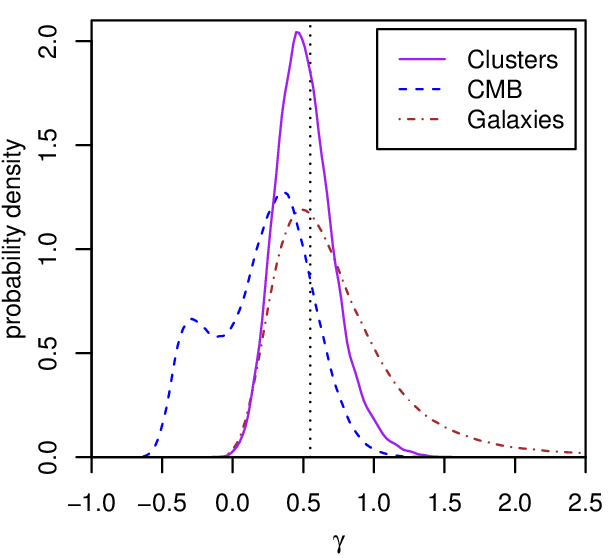

In [31]:
Image(filename="DifficultDensities_multimodes_eg.png", width=350)

## Playtime

### Copy/paste one of the density functions above into your InferenceSandbox, or implement one of the other functions listed on Wikipedia. See how your best Metropolis implementation from earlier in the class performs.

> Another nice density, not listed on Wikipedia, is the spherical shell: $\ln P = -\frac{1}{2\sigma^2}\left(\sqrt{x^2+y^2}-1\right)^2$, for $\sigma \sim 0.1$. This one lends itself to a simple re-parametrization, however!